# Data experiment

## 1 -  Import data
Data source from Stanford Network Analysis Project. FB social circle [SNAP](https://snap.stanford.edu/data/ego-Facebook.html)

reading from edgelist from Gitcoin research [internal repo](https://github.com/jiajia20/GitCoin_attack/blob/main/GR9/GR9_Atk_explore.ipynb)

In [1]:
import pandas as pd
import networkx as nx

In [2]:
edge_df = pd.read_csv('fb.csv', delimiter=' ')
edge_df

,node1,node2
0,236,186
1,122,285
2,24,346
3,271,304
4,176,9
...,...,...
5033,171,58
5034,326,20
5035,85,75
5036,98,332


In [3]:

# Parse the contributions into a NetworkX graph
G = nx.from_pandas_edgelist(edge_df,
                            source='node1',
                            target='node2',
                            create_using=nx.Graph(),
                            edge_attr=True)

In [4]:
nx.draw_spring(G, )

In [5]:
G.nodes[1]

{}

## 2 - Test

In [6]:
from fb_model import *

In [7]:
model = InfoSpread (G, initial_outbreak_size=1, threshold =2, inf_prob = 0.5)
#num_nodes=10, avg_node_degree=3, rewire_prob=.1, initial_outbreak_size=1, threshold = 2
for i in range(50):
    model.step()

In [8]:
df = model.datacollector.get_model_vars_dataframe()

In [9]:
df

,Infected,Susceptible
0,8,325
1,10,323
2,12,321
3,18,315
4,57,276
5,110,223
6,154,179
7,177,156
8,195,138
9,205,128


In [10]:
 from mesa.batchrunner import BatchRunner

#num_nodes=10, avg_node_degree=3, rewire_prob=.1, initial_outbreak_size=1, threshold = 2
inf_prob = []
for i in range(21):
    inf_prob.append(round((i*0.05),3))
#rewire_list = [0, 0.1, 0.2, 0.3]


fixed_params = {"G": G,
               "initial_outbreak_size" : 1,
               "threshold" : 2,
               }
variable_params = {"inf_prob": inf_prob}  #  {"rewire_prob": drange(0.05, 1.0, 0.05)}

batch_run = BatchRunner(InfoSpread,
                        variable_params,
                        fixed_params,
                        iterations= 30,
                        max_steps=20,
                        model_reporters={"infection_list": infected_list})
batch_run.run_all()

630it [01:57,  5.37it/s]


In [11]:
run_data = batch_run.get_model_vars_dataframe()

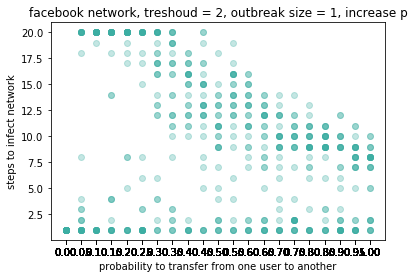

In [12]:
import matplotlib.pyplot as plt
from runtime import *

x = run_data['inf_prob'].values.tolist()
time = calculate_infection_time(run_data)
plt.plot(x,time,'o', color = '#3CAEA3', alpha = 0.3)
plt.xlabel("probability to transfer from one user to another")
plt.ylabel("steps to infect network")
plt.title("facebook network, treshoud = 2, outbreak size = 1, increase p")
plt.xticks(x)
plt.show()

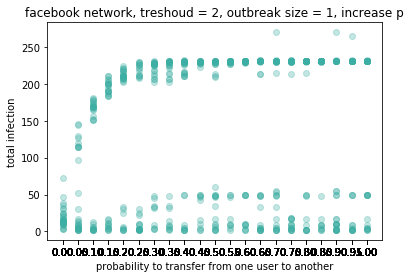

In [13]:
x = run_data['inf_prob'].values.tolist()
inf = calculate_total_infection(run_data)
plt.plot(x,inf,'o', color = '#3CAEA3', alpha = 0.3)
plt.xlabel("probability to transfer from one user to another")
plt.ylabel("total infection")
plt.title("facebook network, treshoud = 2, outbreak size = 1, increase p")
plt.xticks(x)
plt.show()